In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1 ,)

In [4]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [5]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
def plot_sample(X , y , index) :
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

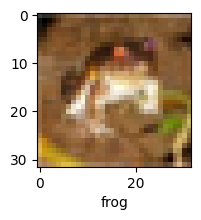

In [7]:
plot_sample(x_train , y_train , 0)

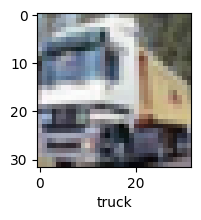

In [8]:
plot_sample(x_train , y_train , 1)


In [9]:
x_train = x_train / 255
x_test = x_test / 255

Building an ANN

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32 , 32 , 3)),
    layers.Dense(3000 , activation = 'relu'),
    layers.Dense(1000 , activation = 'relu'),
    layers.Dense(10 , activation = 'sigmoid')
])

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [11]:
ann.compile(optimizer= 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])


In [12]:
ann.fit(x_train , y_train , epochs= 20)

Epoch 1/20


2023-05-15 23:31:17.278474: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 18s 11ms/step - loss: 1.8127 - accuracy: 0.3553
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6254 - accuracy: 0.4274
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5423 - accuracy: 0.4556
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4828 - accuracy: 0.4777
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4349 - accuracy: 0.4943
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3907 - accuracy: 0.5107
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3543 - accuracy: 0.5256
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3190 - accuracy: 0.5383
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2864 - accuracy: 0.5469
Epoch 10/20
1563/1563 [==============================] - 17s 11ms/step - lo

In [13]:
ann.evaluate(x_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4067 - accuracy: 0.5148


[1.4067045450210571, 0.5148000121116638]

In [14]:
from sklearn.metrics import classification_report


In [15]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 2s 5ms/step


In [16]:
print("Classification Report : \n",classification_report(y_test , y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.54      0.58      1000
           1       0.75      0.53      0.62      1000
           2       0.44      0.42      0.43      1000
           3       0.35      0.45      0.39      1000
           4       0.38      0.62      0.47      1000
           5       0.47      0.42      0.44      1000
           6       0.66      0.53      0.59      1000
           7       0.74      0.50      0.59      1000
           8       0.46      0.82      0.59      1000
           9       0.82      0.32      0.46      1000

    accuracy                           0.51     10000
   macro avg       0.57      0.51      0.52     10000
weighted avg       0.57      0.51      0.52     10000



Creating a CNN model

In [17]:
cnn = models.Sequential([

    layers.Conv2D(filters = 32 , activation = 'relu' , kernel_size = (3,3) , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32 , activation = 'relu' , kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10 , activation = 'softmax')

])

In [18]:
cnn.compile(optimizer= 'adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])

In [19]:
cnn.fit(x_train , y_train , epochs= 20)

Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5007 - accuracy: 0.4574
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1761 - accuracy: 0.5868
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0440 - accuracy: 0.6352
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9643 - accuracy: 0.6640
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9089 - accuracy: 0.6826
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8638 - accuracy: 0.7001
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8268 - accuracy: 0.7114
Epoch 8/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7919 - accuracy: 0.7238
Epoch 9/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7671 - accuracy: 0.7316
Epoch 10/20
1563/1563 [==============================] - 12s 8ms/step - l

In [20]:
cnn.evaluate(x_test , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0406 - accuracy: 0.6839


[1.0406330823898315, 0.683899998664856]

In [21]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
y_classes = [np.argmax(element) for element in y_pred]

In [23]:
y_test = y_test.reshape(-1,)

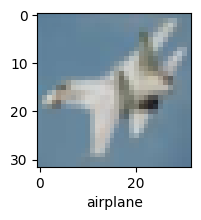

'deer'

In [24]:
INDEX = 10
plot_sample(x_test , y_test , INDEX)
classes[y_classes[INDEX]]


In [25]:
print("Classification report : \n" , classification_report(y_test , y_classes) )

Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.79      0.80      0.80      1000
           2       0.60      0.57      0.58      1000
           3       0.47      0.55      0.51      1000
           4       0.69      0.58      0.63      1000
           5       0.57      0.61      0.59      1000
           6       0.76      0.76      0.76      1000
           7       0.73      0.72      0.72      1000
           8       0.83      0.73      0.77      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



In [63]:
cnn.save("./cifar_cnn_classification_model")

INFO:tensorflow:Assets written to: ./cifar_cnn_classification_model/assets


INFO:tensorflow:Assets written to: ./cifar_cnn_classification_model/assets
